In [386]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [387]:
# Load data from CSV file
df = pd.read_csv('crypto_data_27_august.csv')

In [388]:
# Convert 'Date' column to datetime
try:
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
except ValueError:
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [389]:
# Set 'Date' column as index
df.set_index('Date', inplace=True)

In [390]:
# Split data into training and testing sets
train_data = df.loc[:'2022-01-31']
test_data = df.loc['2017-02-01':]

In [391]:
model = ARIMA(train_data['Adj Close (BTC)'], order=(5,1,0))
results = model.fit()

C:\Users\zeesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\zeesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\zeesh\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [392]:
# Forecast values for next month
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1


In [393]:
forecast = results.predict(start=start_index, end=end_index, typ='levels')

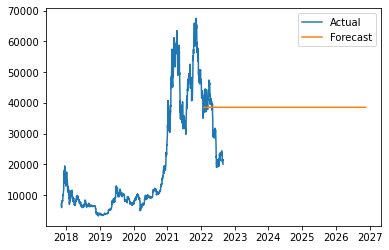

In [394]:
# Plot actual and predicted values
plt.plot(test_data['Adj Close (BTC)'], label='Actual')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


In [395]:
# Scale the volume data
scaler = StandardScaler()
X_train = scaler.fit_transform(train_data[['Volume (BTC)', 'Volume (ETH)', 'Volume (USDT)', 'Volume (BNB)']])
X_test = scaler.transform(test_data[['Volume (BTC)', 'Volume (ETH)', 'Volume (USDT)', 'Volume (BNB)']])


In [396]:
# Fit linear regression model to training data
regressor = LinearRegression()
regressor.fit(X_train, train_data['Adj Close (BTC)'])


LinearRegression()

In [397]:
y_pred = regressor.predict(X_test)
r2 = r2_score(test_data['Adj Close (BTC)'], y_pred)

In [398]:
print('R-squared score:', r2)

R-squared score: 0.7012961185241797
